## Data Exploration

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
df = pd.read_csv("dataset.csv")

In [40]:
df.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


8 numerical features and 10 categorical features

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [42]:
df.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


Since the range of scales of the features are different. So, data normalization (feature scaling) is needed to perform on the data set.

In [43]:
df["Cardiovascular_risk(y)"].value_counts()

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64

## Data Visualization

### Visualization of Numerical Data

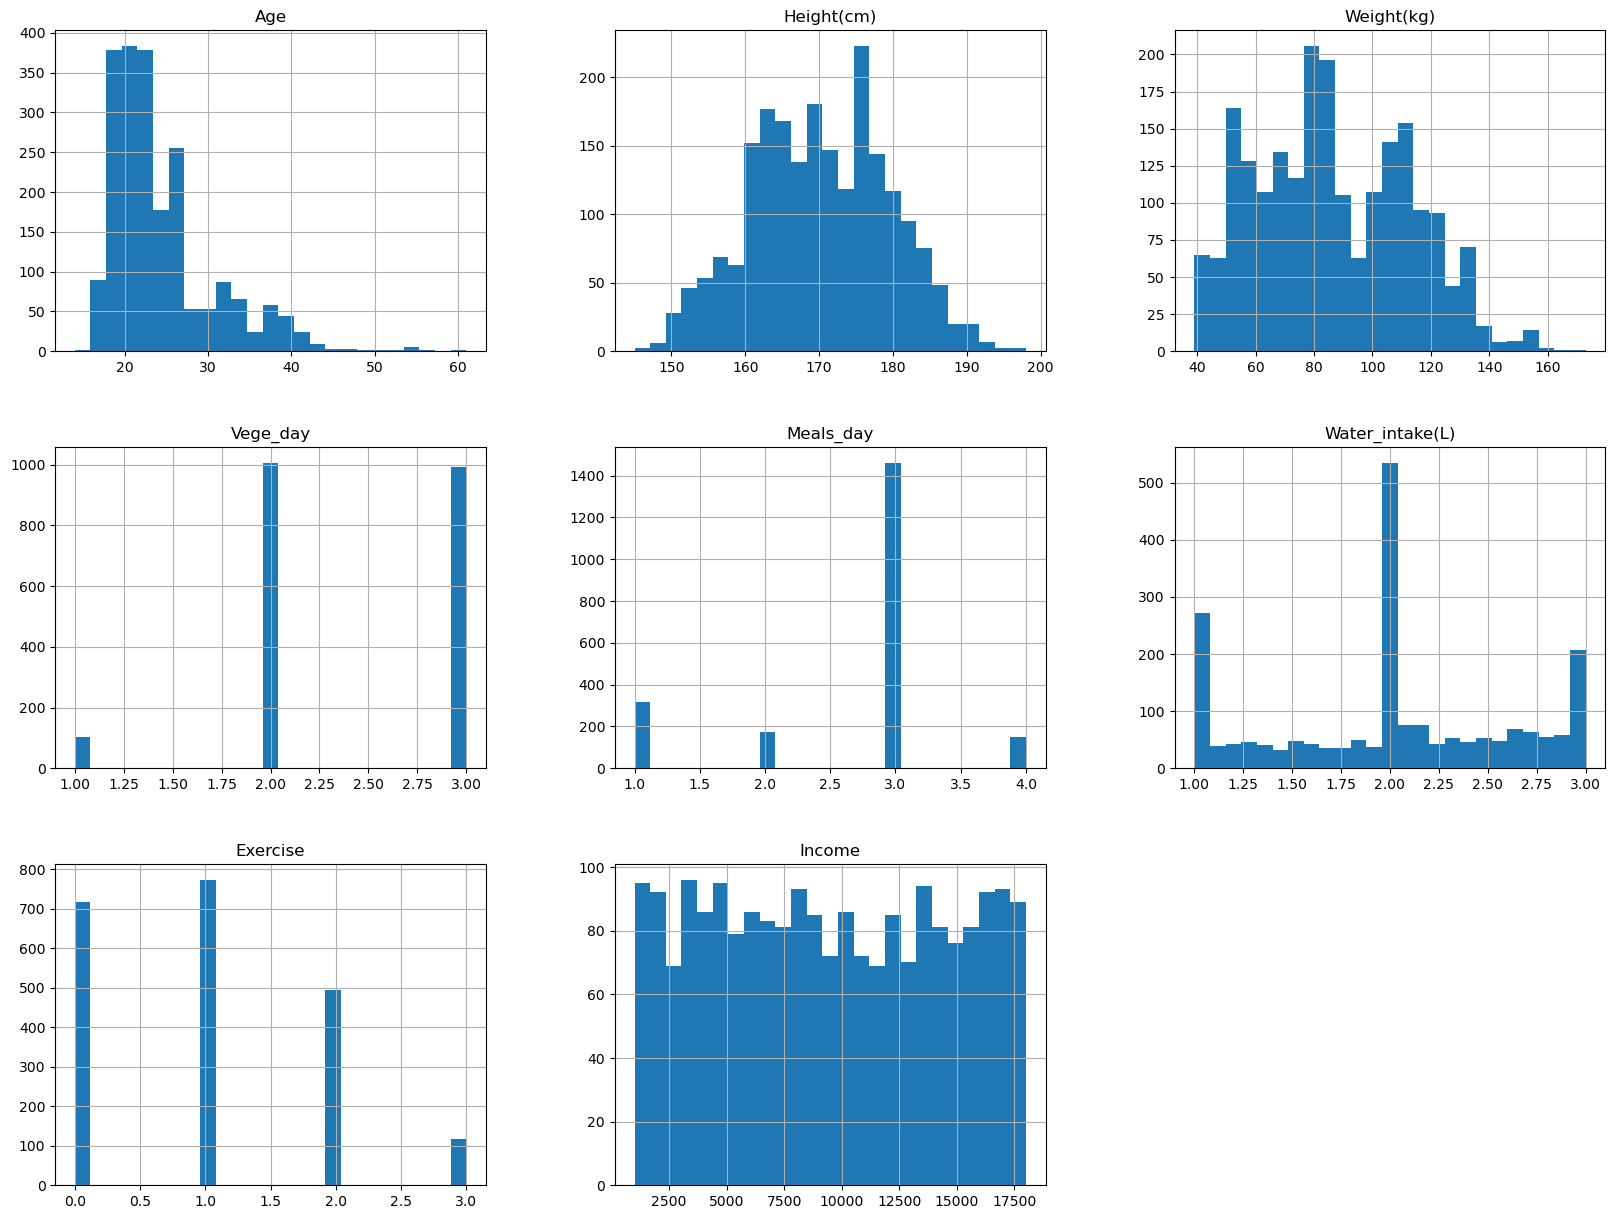

In [44]:
#Show all histogram of numerical features
df.hist(bins=25,figsize=(20,15))
plt.show()

### Visualization of Categorical Data

In [45]:
import seaborn as sns

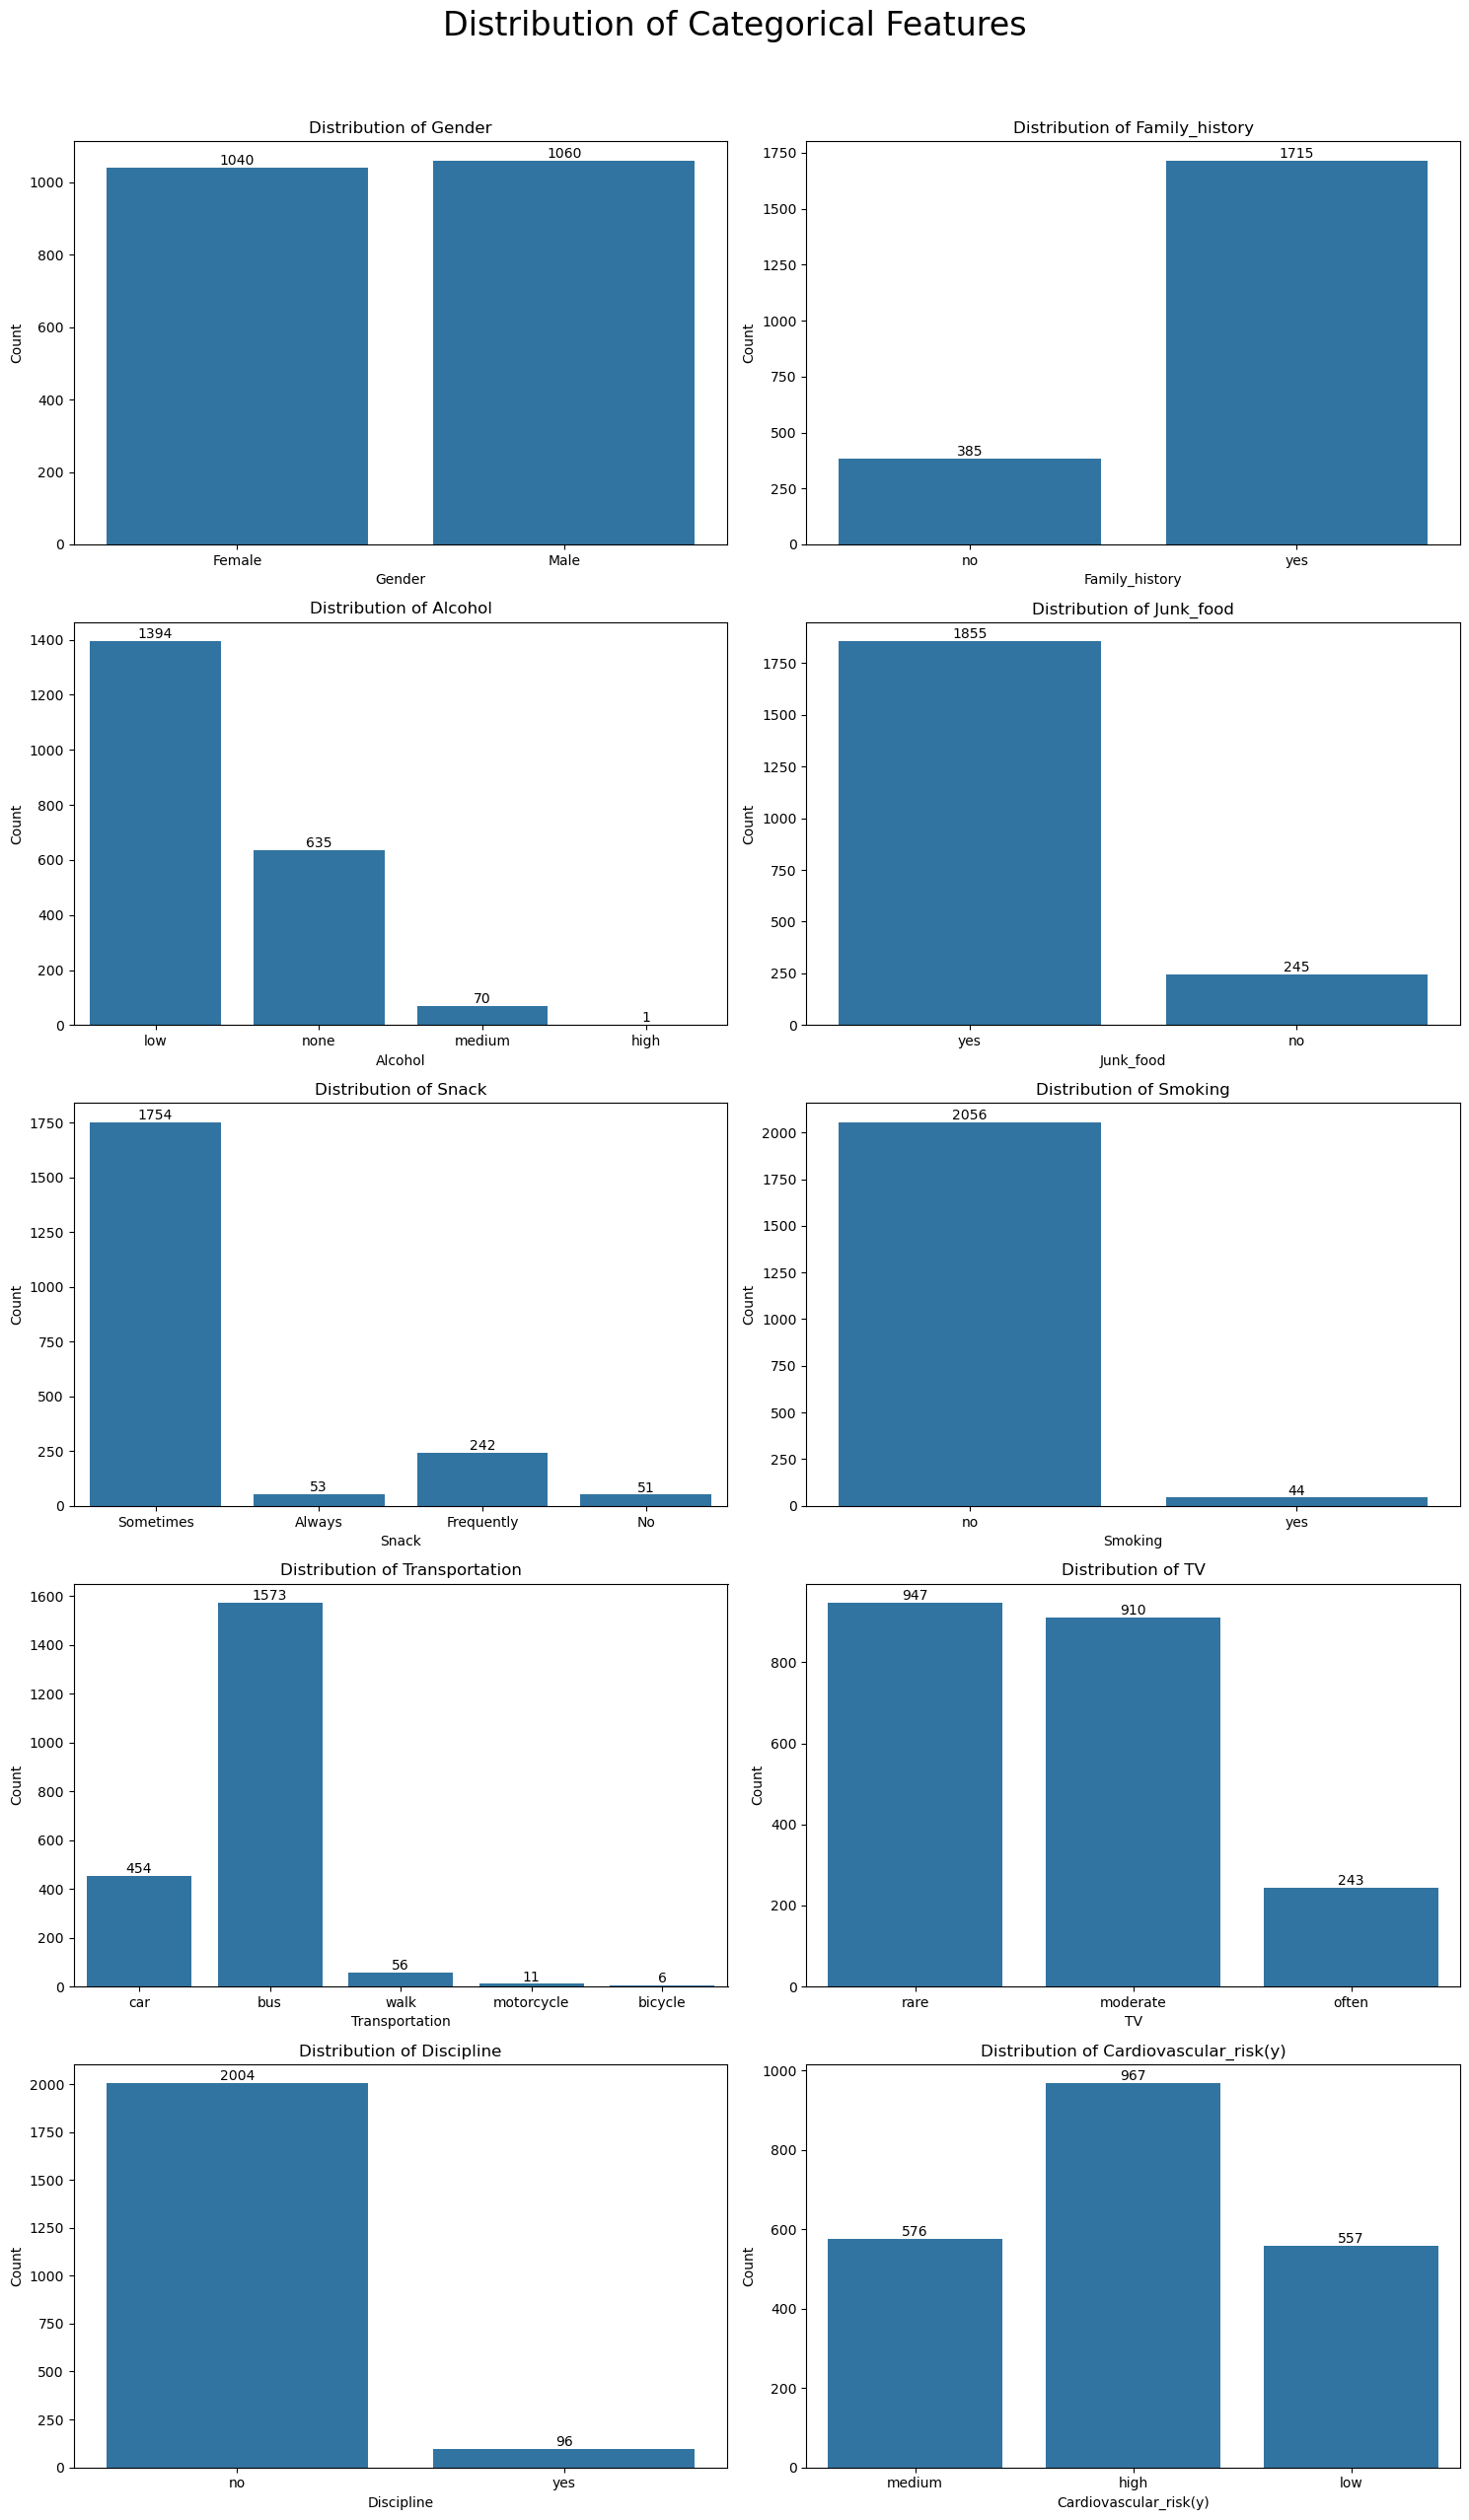

In [46]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(categorical_columns) - 1) // n_cols + 1

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle("Distribution of Categorical Features", fontsize=24, y=1.02)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Create the countplot
    sns.countplot(data=df, x=col, ax=ax)
    
    ax.set_xticks(ax.get_xticks())  # Set the current ticks explicitly
    
    # Set title and labels
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualization of Relationship between Cardiovascular Risks Levels and Its Different Factors

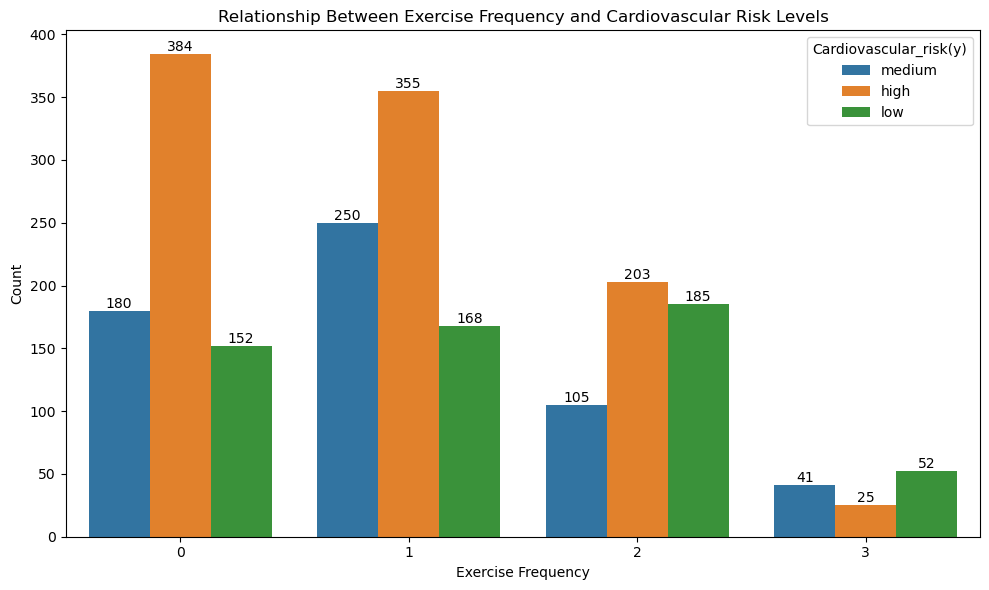

In [47]:
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Exercise', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Exercise Frequency and Cardiovascular Risk Levels')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

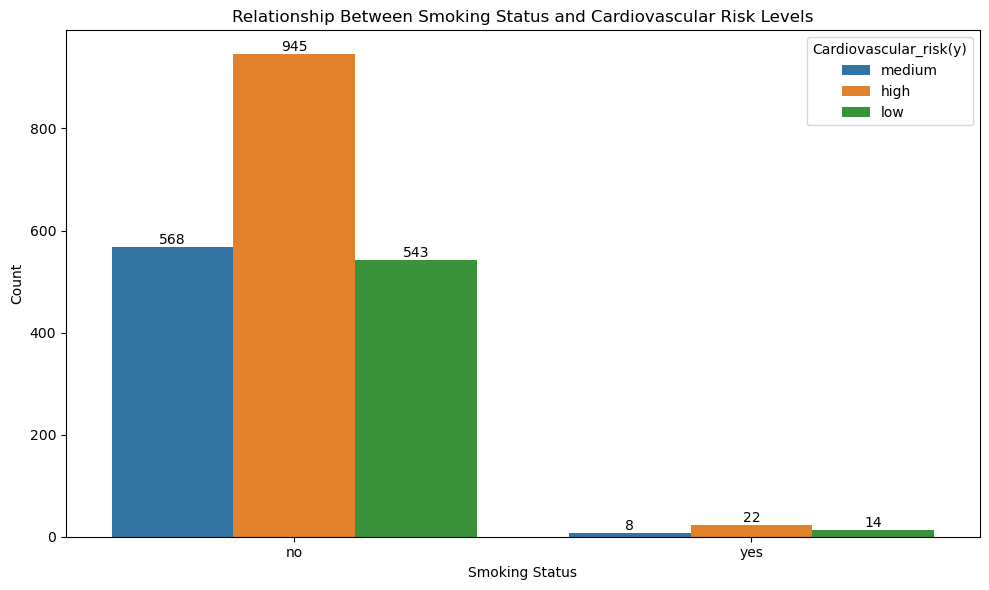

In [48]:
# Bar Chart: Cardiovascular Risk by Smoking Status
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Smoking', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Smoking Status and Cardiovascular Risk Levels')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

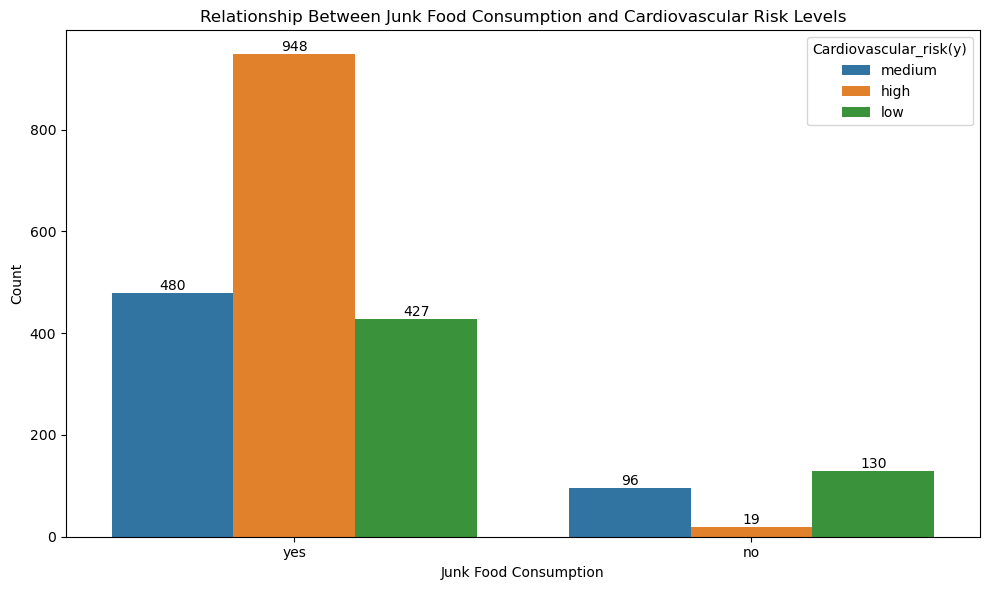

In [49]:
# Bar Chart: Cardiovascular Risk by Junk Food Consumption
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Junk_food', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Junk Food Consumption and Cardiovascular Risk Levels')
plt.xlabel('Junk Food Consumption')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

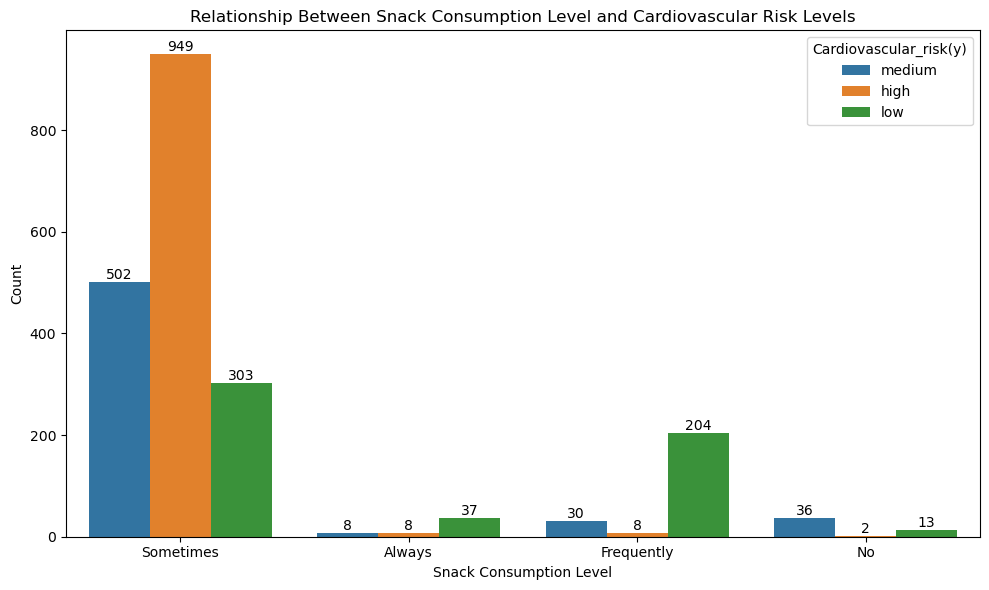

In [50]:
# Bar Chart: Cardiovascular Risk by Snack Consumption
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Snack', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Snack Consumption Level and Cardiovascular Risk Levels')
plt.xlabel('Snack Consumption Level')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

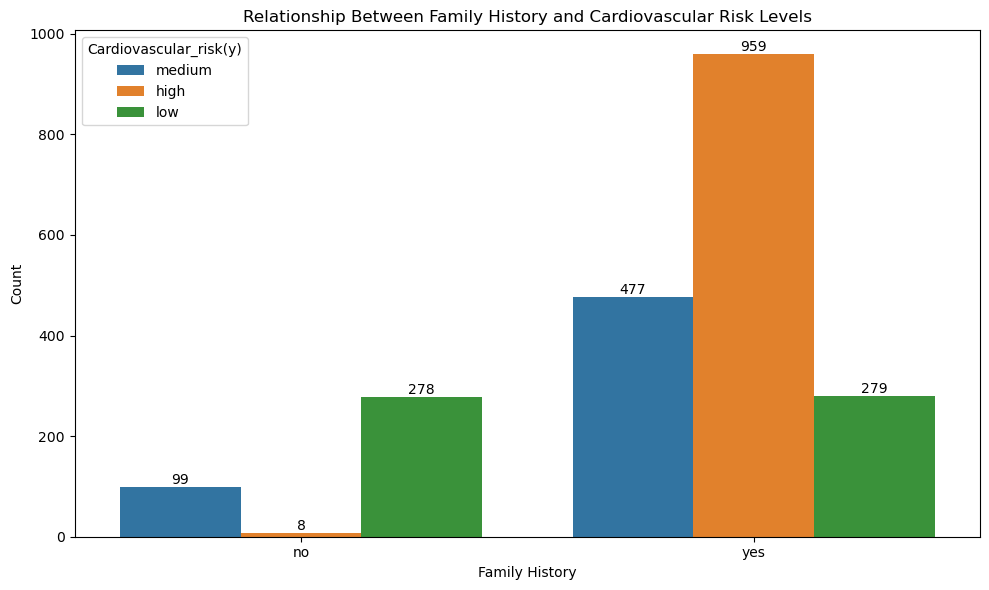

In [51]:
# Bar Chart: Cardiovascular Risk by Family History
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Family_history', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Family History and Cardiovascular Risk Levels')
plt.xlabel('Family History')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

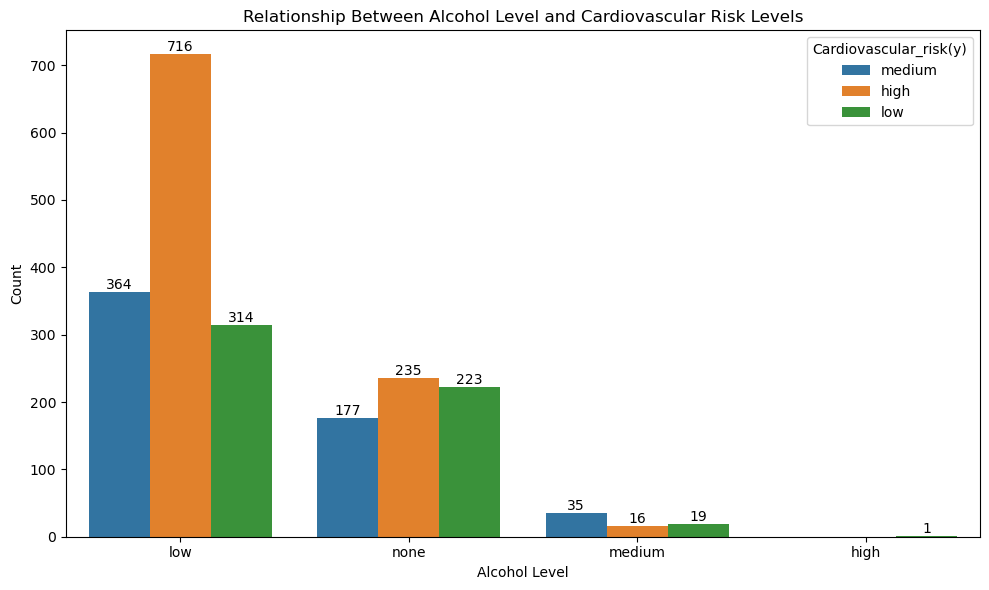

In [52]:
# Bar Chart: Cardiovascular Risk by Alcohol Consumption Level
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(x='Alcohol', hue='Cardiovascular_risk(y)', data=df)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set title and labels
plt.title('Relationship Between Alcohol Level and Cardiovascular Risk Levels')
plt.xlabel('Alcohol Level')
plt.ylabel('Count')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

### Visualization the Outlier of Age, Weight(kg) and Height(cm)

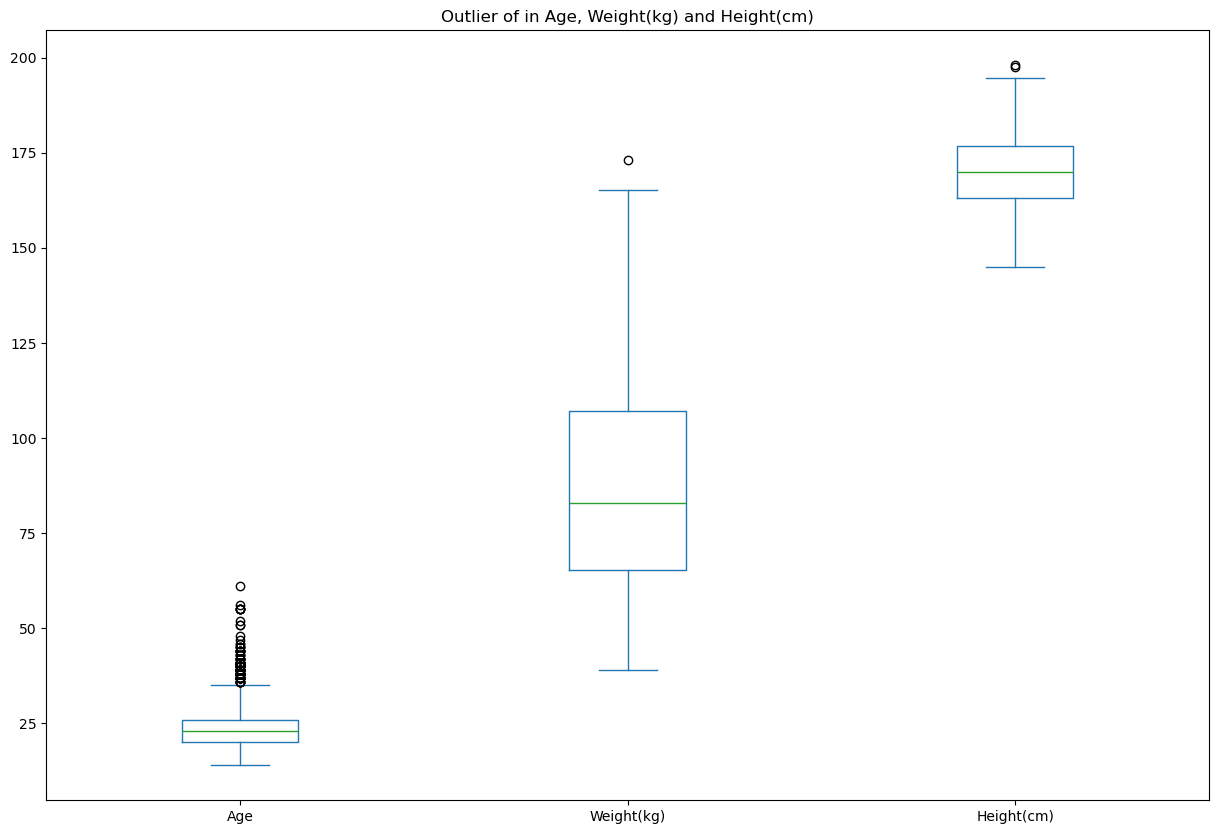

In [53]:
outlier1 = df[['Age','Weight(kg)','Height(cm)']]
outlier1.plot(kind='box',figsize=(15,10))
plt.title('Outlier of in Age, Weight(kg) and Height(cm)')
plt.show()

### Visualization of Age Distribution

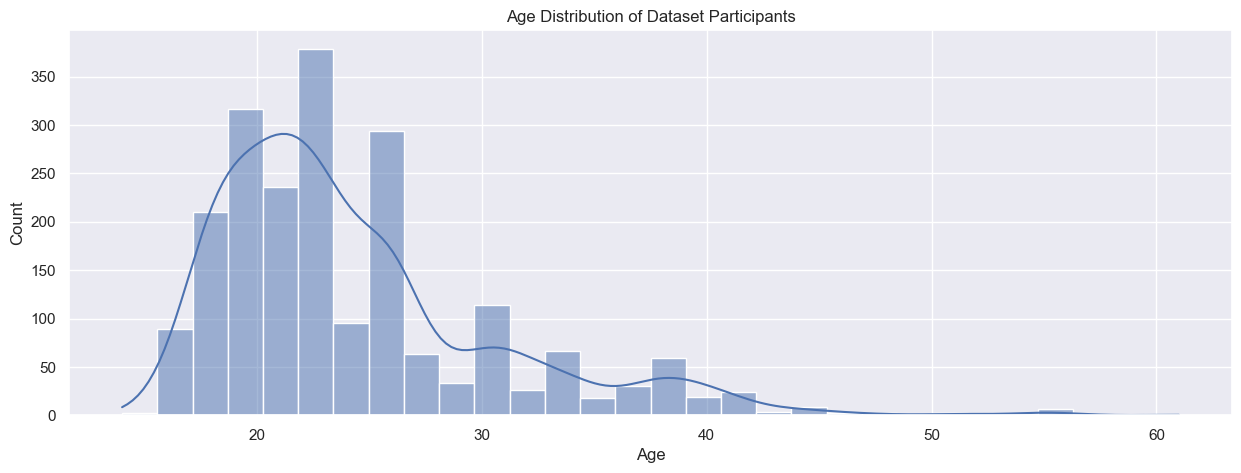

In [54]:
sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Dataset Participants')
plt.show()

## Data Preprocessing

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("dataset.csv")
df.isnull().sum() #Check whether the dataset has null value

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

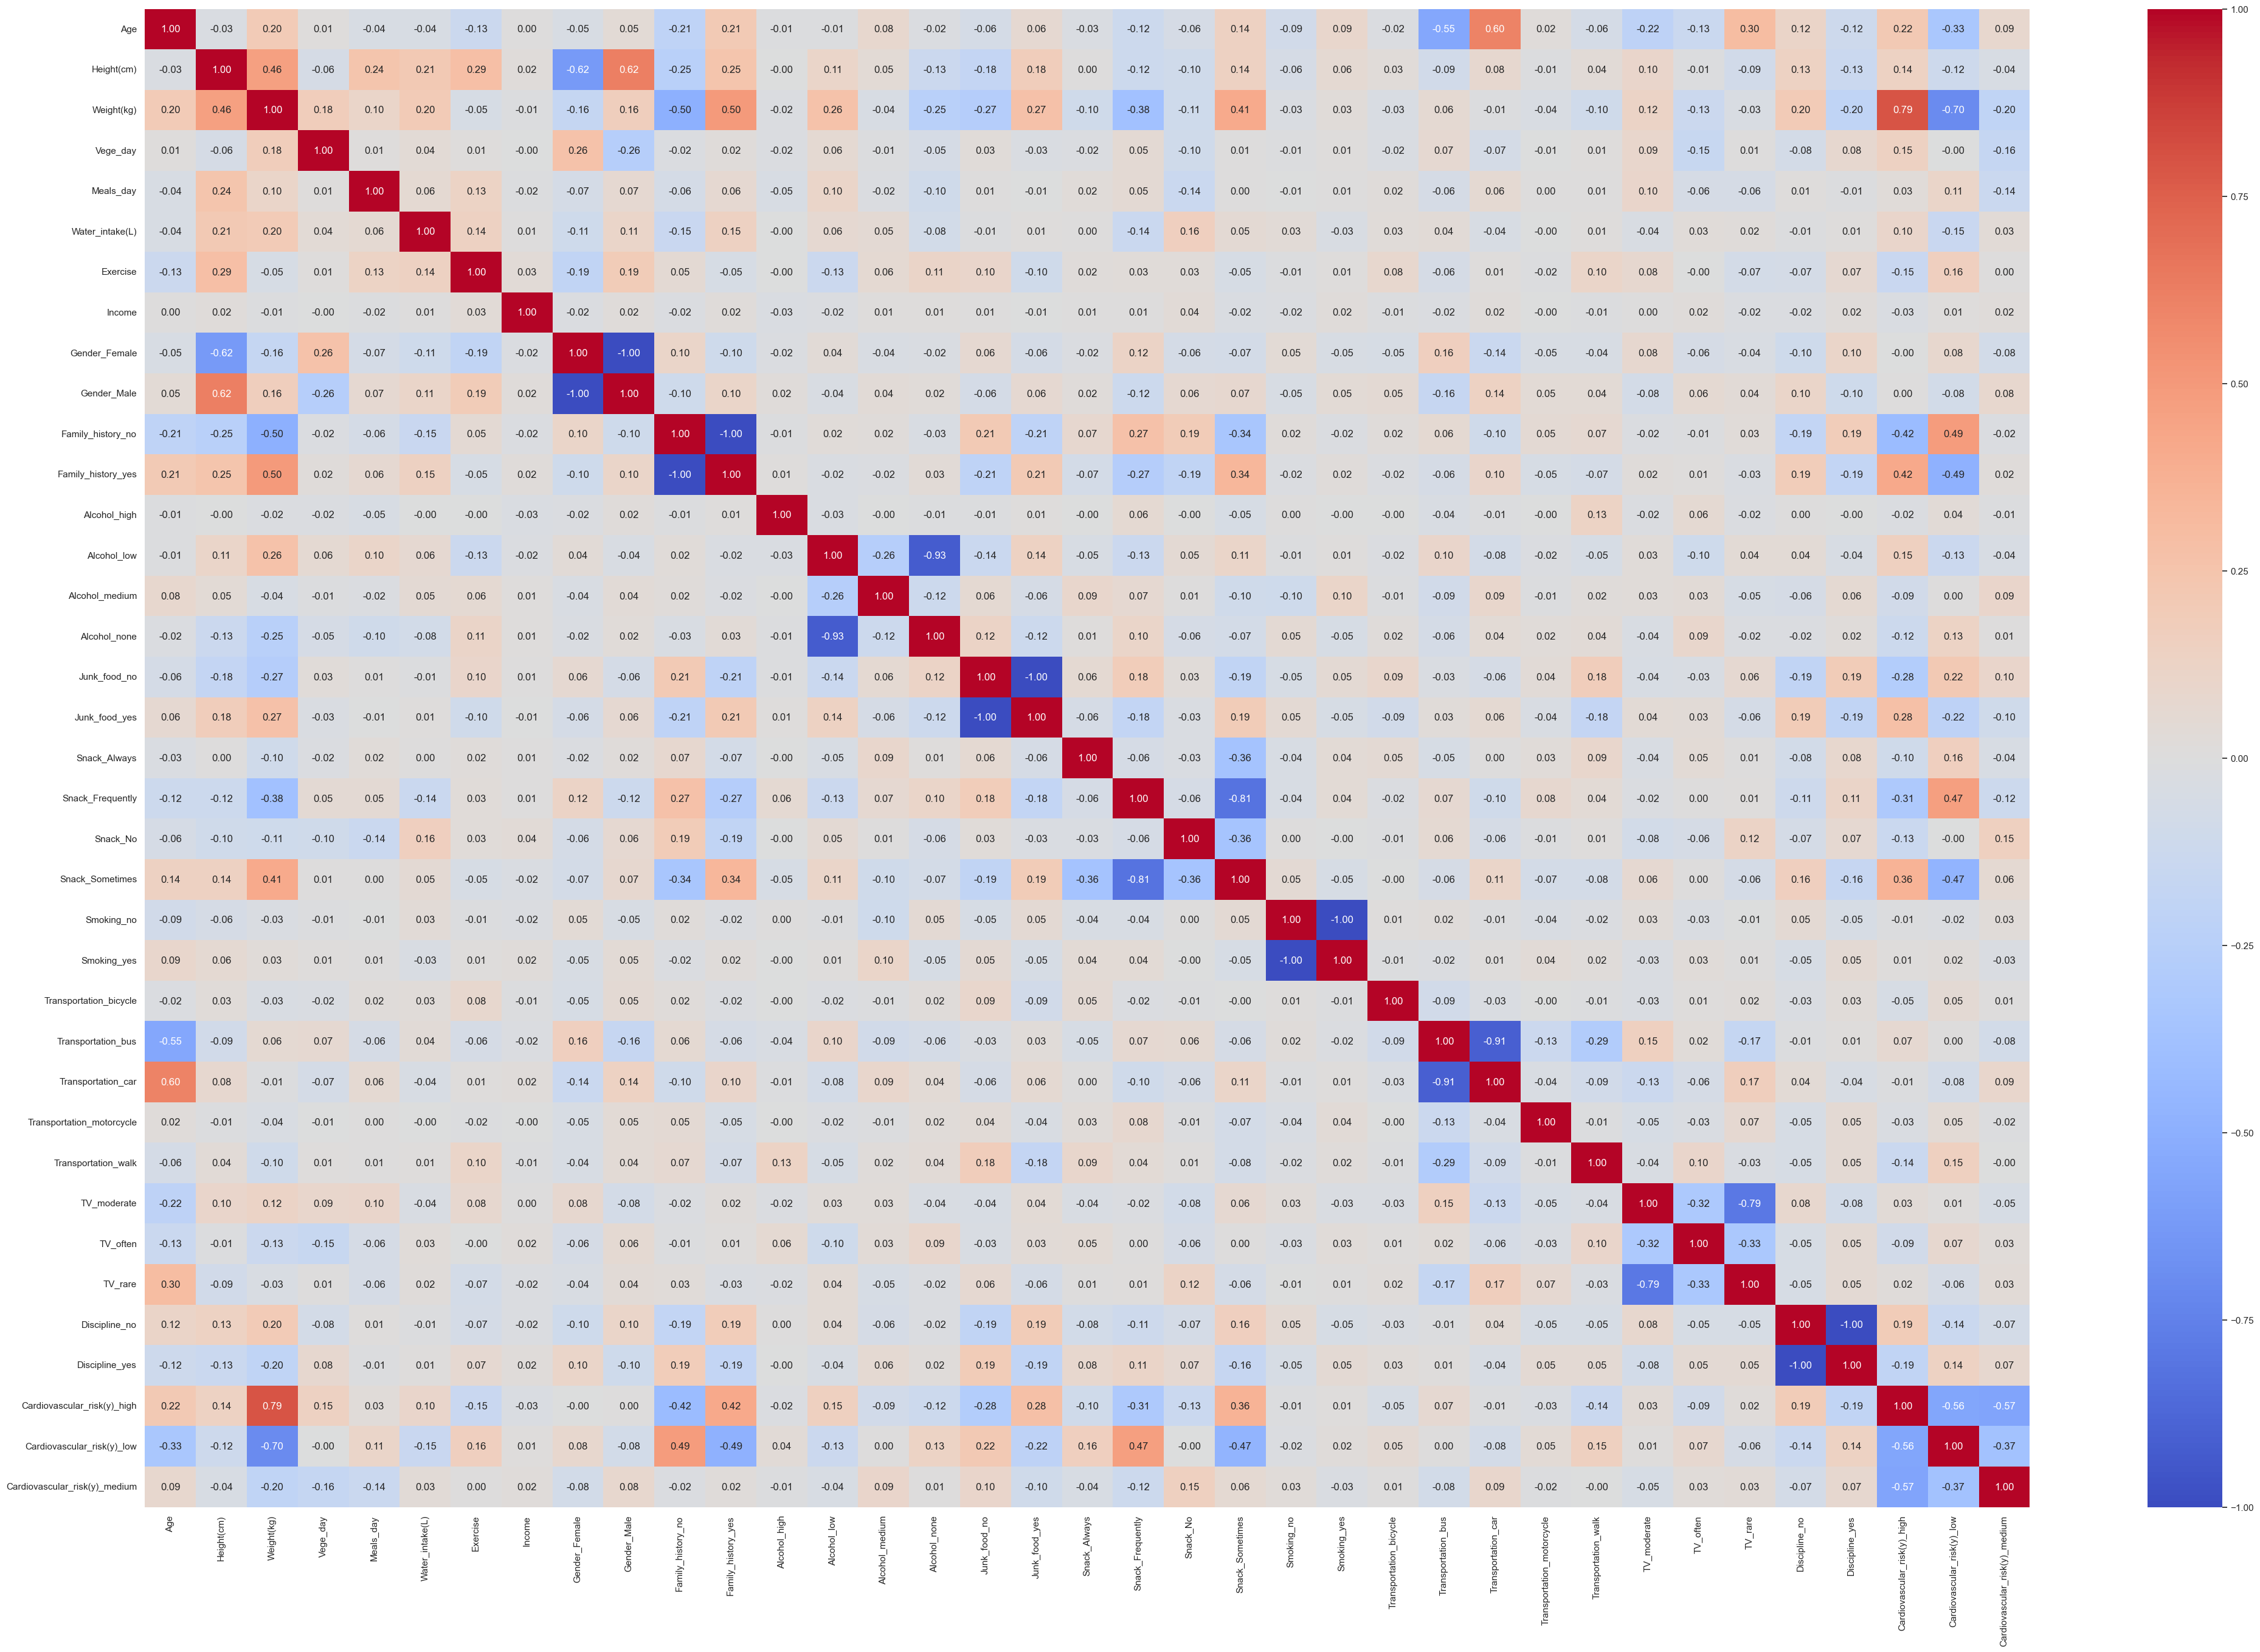

In [56]:
# Convert categorical variables to numeric using one-hot encoding
df_numeric = pd.get_dummies(df)
# Now calculate the correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(50, 32))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [57]:
# There are 9 categorical features in the dateset.
#Analyzing the categorical data
gender_counts = df["Gender"].value_counts()
family_history_counts = df["Family_history"].value_counts()
alcohol_counts = df["Alcohol"].value_counts()
junk_food_counts = df["Junk_food"].value_counts()
snack_counts = df["Snack"].value_counts()
smoking_counts = df["Smoking"].value_counts()
transportation_counts = df["Transportation"].value_counts()
tv_counts = df["TV"].value_counts()
discipline_counts = df["Discipline"].value_counts()
cardio_risk_counts = df["Cardiovascular_risk(y)"].value_counts()

print(gender_counts, end="\n\n")
print(family_history_counts, end="\n\n")
print(alcohol_counts, end="\n\n")
print(junk_food_counts, end="\n\n")
print(snack_counts, end="\n\n")
print(smoking_counts, end="\n\n")
print(transportation_counts, end="\n\n")
print(tv_counts, end="\n\n")
print(discipline_counts, end="\n\n")
print(cardio_risk_counts)

Gender
Male      1060
Female    1040
Name: count, dtype: int64

Family_history
yes    1715
no      385
Name: count, dtype: int64

Alcohol
low       1394
none       635
medium      70
high         1
Name: count, dtype: int64

Junk_food
yes    1855
no      245
Name: count, dtype: int64

Snack
Sometimes     1754
Frequently     242
Always          53
No              51
Name: count, dtype: int64

Smoking
no     2056
yes      44
Name: count, dtype: int64

Transportation
bus           1573
car            454
walk            56
motorcycle      11
bicycle          6
Name: count, dtype: int64

TV
rare        947
moderate    910
often       243
Name: count, dtype: int64

Discipline
no     2004
yes      96
Name: count, dtype: int64

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64


In [58]:
#Since Cardiovascular_risk is y, so drop it from X and add it to vector y

X = df.drop(['Cardiovascular_risk(y)', 'Gender','Income','TV'], axis=1)

y=df['Cardiovascular_risk(y)']

# Show the shapes and types of X and y
print ('Shape of original dataset, train:', df.shape)
print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

#Split the dataset into the training set 'train' and testing set 'test' 
#Because data processing needs to categorize data into same feature
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('full set shape=', X.shape)
print ('train shape=', X_train.shape)
print ('test shape=', X_test.shape)

# Split the input matrix into numerical and categorical sets
#train set
X_train_num=X_train.drop(['Age','Weight(kg)','Height(cm)','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','Discipline'],axis=1)
X_train_cat=X_train[['Family_history','Junk_food','Smoking','Discipline']]


print('X_train_num shape:', X_train_num.shape)
print('X_train_cat shape:', X_train_cat.shape)


X_test_num=X_test.drop(['Age','Weight(kg)','Height(cm)','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','Discipline'],axis=1)
X_test_cat=X_test[['Family_history','Junk_food','Smoking','Discipline']]
print('X_test_num shape:', X_test_num.shape)
print('X_test_cat shape:', X_test_cat.shape)

Shape of original dataset, train: (2100, 18)
X: shape= (2100, 14) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>
full set shape= (2100, 14)
train shape= (1680, 14)
test shape= (420, 14)
X_train_num shape: (1680, 4)
X_train_cat shape: (1680, 4)
X_test_num shape: (420, 4)
X_test_cat shape: (420, 4)


### Data Preprocessing for Train data

In [59]:
X_train_num=X_train.drop(['Age','Weight(kg)','Height(cm)','Family_history','Alcohol','Junk_food','Snack',
                          'Smoking','Transportation','Discipline'],axis=1)
X_train_cat=X_train[['Family_history','Junk_food','Smoking','Discipline']]

X_train_Age=X_train[['Age']]
X_train_ord_Height=X_train[['Height(cm)']]
X_train_ord_Weight=X_train[['Weight(kg)']]
X_train_ord_Snack=X_train[['Snack']]
X_train_ord_Transportation=X_train[['Transportation']]
X_train_ord_Alcohol=X_train[['Alcohol']]
#Since there is no missing value, so we can directly standardize the feature
#Preprocessing numerical data by standardization
scaler=StandardScaler(copy=False)
scaler.fit(X_train_num)
X_train_num_scaled=scaler.transform(X_train_num)

#Age
# Apply log transformation to the Age column
X_train_Age = np.log(X_train['Age'] + 1).values.reshape(-1, 1)  # Adding 1 to avoid log(0)
scaler.fit(X_train_Age)
X_train_Age_scaled=scaler.transform(X_train_Age)

#Height
Q1 = X_train_ord_Height['Height(cm)'].quantile(0.25)
Q3 = X_train_ord_Height['Height(cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove or outliers
X_train_ord_Height = X_train_ord_Height[(X_train_ord_Height['Height(cm)'] >= lower_bound) & (X_train_ord_Height['Height(cm)'] <= upper_bound)]
# Fit the scaler on the Height data and transform it
scaler.fit(X_train_ord_Height)
X_train_ord_Height_scaled=scaler.transform(X_train_ord_Height)

#Weight
X_train_ord_Weight = np.log(X_train['Weight(kg)'] + 1).values.reshape(-1, 1)  # Adding 1 to avoid log(0)
scaler.fit(X_train_ord_Weight)
X_train_ord_Weight_scaled=scaler.transform(X_train_ord_Weight)

#Preprocessing categorical data by One-hot encoding
#encode the categorical feature into into one-hot representation
# Initialize an empty list to store the transformed columns
lb_encoders = {}  # Dictionary to store LabelBinarizers for each column

X_train_cat_encoded = []

# Loop through each categorical column and fit the LabelBinarizer
for col in X_train_cat.columns:
    lb_encoder = LabelBinarizer()
    lb_encoder.fit(X_train_cat[col])
    lb_encoders[col] = lb_encoder

    # Transform each categorical column using the respective LabelBinarizer
    encoded_col = lb_encoder.transform(X_train_cat[col])
    X_train_cat_encoded.append(encoded_col)

# Convert the list of encoded columns back to an array
X_train_cat = np.hstack(X_train_cat_encoded)

# Ordinal Encoder for Snack attributes
order_of_categories = ['Always', 'Frequently', 'No', 'Sometimes']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_train_ord_Snack.shape[1])
X_train_ord_Snack_encoded = ord_encoder.fit_transform(X_train_ord_Snack)

# Standardize Snack
scaler = StandardScaler(copy = False)
scaler.fit(X_train_ord_Snack_encoded)
X_train_ord_Snack_encoded = scaler.transform((X_train_ord_Snack_encoded))

# Ordinal Encoder for Transportation attributes
order_of_categories = ['bicycle', 'bus', 'car', 'motorcycle','walk']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_train_ord_Transportation.shape[1])
X_train_ord_Transportation_encoded = ord_encoder.fit_transform(X_train_ord_Transportation)

# Standardize Transportation
scaler = StandardScaler(copy = False)
scaler.fit(X_train_ord_Transportation_encoded)
X_train_ord_Transportation_encoded = scaler.transform((X_train_ord_Transportation_encoded))

# Ordinal Encoder for Alcohol attributes
order_of_categories = ['high', 'low', 'medium', 'none']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_train_ord_Alcohol.shape[1])
X_train_ord_Alcohol_encoded = ord_encoder.fit_transform(X_train_ord_Alcohol)

# Standardize Alcohol
scaler = StandardScaler(copy = False)
scaler.fit(X_train_ord_Alcohol_encoded)
X_train_ord_Alcohol_encoded = scaler.transform((X_train_ord_Alcohol_encoded))

# Number of columns
print(X_train_cat.shape[1])
print(X_train_ord_Snack_encoded.shape[1])
print(X_train_ord_Transportation_encoded.shape[1])
print(X_train_num_scaled.shape[1])

# Combine all the attributes
X_train_tr = np.hstack([X_train_num_scaled,X_train_Age_scaled,
                        X_train_ord_Height_scaled,X_train_ord_Weight_scaled,
                       X_train_cat,X_train_ord_Snack_encoded,X_train_ord_Transportation_encoded,
                       X_train_ord_Alcohol_encoded])
print(X_train_tr.shape[1])

4
1
1
4
14


### Data Preprocessing for Test data

In [60]:
# Data splitting
X_test_num = X_test.drop(['Age', 'Weight(kg)', 'Height(cm)', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'Discipline'], axis=1)
X_test_cat = X_test[['Family_history', 'Junk_food', 'Smoking', 'Discipline']]
X_test_Age = X_test[['Age']]
X_test_ord_Height = X_test[['Height(cm)']]
X_test_ord_Weight = X_test[['Weight(kg)']]
X_test_ord_Snack = X_test[['Snack']]
X_test_ord_Transportation = X_test[['Transportation']]
X_test_ord_Alcohol = X_test[['Alcohol']]

# Preprocessing numerical data by standardization
scaler.fit(X_test_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Age
X_test_Age = np.log(X_test['Age'] + 1).values.reshape(-1, 1)
scaler.fit(X_test_Age)
X_test_Age_scaled = scaler.transform(X_test_Age)

# Height
Q1 = X_test_ord_Height['Height(cm)'].quantile(0.25)
Q3 = X_test_ord_Height['Height(cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_test_ord_Height = X_test_ord_Height[(X_test_ord_Height['Height(cm)'] >= lower_bound) & (X_test_ord_Height['Height(cm)'] <= upper_bound)]
scaler.fit(X_test_ord_Height)
X_test_ord_Height_scaled = scaler.transform(X_test_ord_Height)

#Weight
X_test_ord_Weight = np.log(X_test['Weight(kg)'] + 1).values.reshape(-1, 1)  # Adding 1 to avoid log(0)
scaler.fit(X_test_ord_Weight)
X_test_ord_Weight_scaled=scaler.transform(X_test_ord_Weight)

# Preprocessing categorical data by One-hot encoding
X_test_cat_encoded = []

# Loop through each categorical column and fit the LabelBinarizer
for col in X_test_cat.columns:
    lb_encoder = LabelBinarizer()
    lb_encoder.fit(X_test_cat[col])
    lb_encoders[col] = lb_encoder
    
    # Transform each categorical column using the respective LabelBinarizer
    encoded_col = lb_encoder.transform(X_test_cat[col])
    X_test_cat_encoded.append(encoded_col)

#Preprocessed Categorical Data

# Convert the list of encoded columns back to an array
X_test_cat = np.hstack(X_test_cat_encoded)

# Ordinal Encoder for Snack attributes
order_of_categories = ['Always', 'Frequently', 'No', 'Sometimes']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_test_ord_Snack.shape[1])
X_test_ord_Snack_encoded = ord_encoder.fit_transform(X_test_ord_Snack)
# Standardize Snack
scaler = StandardScaler(copy = False)
scaler.fit(X_test_ord_Snack_encoded)
X_test_ord_Snack_encoded = scaler.transform((X_test_ord_Snack_encoded))

# Ordinal Encoder for Transportation attributes
order_of_categories = ['bicycle', 'bus', 'car', 'motorcycle','walk']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_test_ord_Transportation.shape[1])
X_test_ord_Transportation_encoded = ord_encoder.fit_transform(X_test_ord_Transportation)
# Standardize Transportation
scaler = StandardScaler(copy = False)
scaler.fit(X_test_ord_Transportation_encoded)
X_test_ord_Transportation_encoded = scaler.transform((X_test_ord_Transportation_encoded))

# Ordinal Encoder for Alcohol attributes
order_of_categories = ['high', 'low', 'medium', 'none']
ord_encoder = OrdinalEncoder(categories=[order_of_categories]*X_test_ord_Alcohol.shape[1])
X_test_ord_Alcohol_encoded = ord_encoder.fit_transform(X_test_ord_Alcohol)
# Standardize Alcohol
scaler = StandardScaler(copy = False)
scaler.fit(X_test_ord_Alcohol_encoded)
X_test_ord_Alcohol_encoded = scaler.transform((X_test_ord_Alcohol_encoded))
# Number of columns
print(X_test_cat.shape[1])
print(X_test_ord_Snack_encoded.shape[1])
print(X_test_ord_Transportation_encoded.shape[1])
print(X_test_num_scaled.shape[1])
# Combine all the attributes
X_test_tr = np.hstack([X_test_num_scaled,X_test_Age_scaled,
                        X_test_ord_Height_scaled,X_test_ord_Weight_scaled,
                       X_test_cat,X_test_ord_Snack_encoded,X_test_ord_Transportation_encoded,
                      X_test_ord_Alcohol_encoded])
print(X_test_tr.shape[1])

4
1
1
4
14


## First Model: SVM (Model Training and Validation, Tuning and Testing, Performance Visualization)

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

In [62]:
clf = SVC(kernel='rbf',random_state=42,decision_function_shape='ovo') 

# fitting x samples and y classes 
clf.fit(X_train_tr, y_train)

print("Performance of model:")
#accuracy for train set
y_pred = clf.predict(X_train_tr)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Set Accuracy: {accuracy}")
# Print the classification report for the training set
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred))

#accuracy for test set
y_pred = clf.predict(X_test_tr)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")
# Print the classification report for the testing set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

Performance of model:
Train Set Accuracy: 0.9821428571428571

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       1.00      0.99      0.99       787
         low       0.98      0.96      0.97       439
      medium       0.95      0.99      0.97       454

    accuracy                           0.98      1680
   macro avg       0.98      0.98      0.98      1680
weighted avg       0.98      0.98      0.98      1680

Test Set Accuracy: 0.9452380952380952

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.98      0.99      0.99       180
         low       0.93      0.91      0.92       118
      medium       0.90      0.91      0.91       122

    accuracy                           0.95       420
   macro avg       0.94      0.94      0.94       420
weighted avg       0.95      0.95      0.95       420



### Cross Validation on SVM Model

In [63]:
#perform cross validation to check how well new data fits
scores = cross_val_score(clf, X_train_tr, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy accross folds:", scores.mean())

Cross-validation scores: [0.94345238 0.94047619 0.94940476 0.94047619 0.94642857]
Mean accuracy accross folds: 0.944047619047619


### Hyperparameter Tuning with GridSearch for SVM

In [64]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1],  # Expanded range for C
    'gamma': [1,0.1,0.01],  # Expanded range for gamma
    'kernel': ['rbf'],
    }

# Perform GridSearchCV with stratified k-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the entire training data
grid_search.fit(X_train_tr, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

print("Best parameters:", best_params)

Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


### Use Best Parameter to train train set and test set then show classification report

In [65]:
# Evaluate the model on the train set using the best estimator
y_pred = best_svc.predict(X_train_tr)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy}")

# Print the classification report for the training set
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred))

# Evaluate the model on the test set using the best estimator
y_pred = best_svc.predict(X_test_tr)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Print the cross-validation scores for the best model
cv_scores = cross_val_score(best_svc, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Train Accuracy: 0.905952380952381

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       0.96      0.94      0.95       787
         low       0.89      0.89      0.89       439
      medium       0.83      0.86      0.84       454

    accuracy                           0.91      1680
   macro avg       0.89      0.90      0.90      1680
weighted avg       0.91      0.91      0.91      1680

Test Accuracy: 0.8571428571428571

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.91      0.93      0.92       180
         low       0.86      0.84      0.85       118
      medium       0.77      0.76      0.77       122

    accuracy                           0.86       420
   macro avg       0.85      0.84      0.85       420
weighted avg       0.86      0.86      0.86       420


Cross-Validation Accuracy Scores: [0.88988095 0.88988095 0.88690476 0.83630952 0.87202381]
Mean Cr

### Precision-Recall Curve (Training Set)

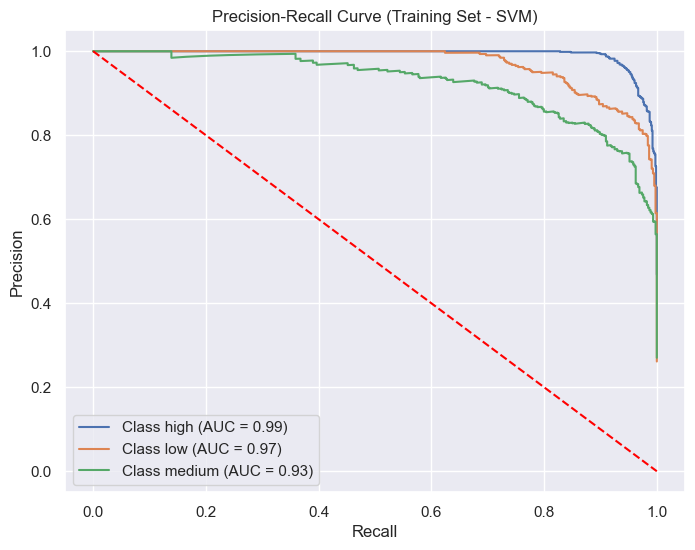

In [66]:
# Fit the model
best_svc = SVC(C=0.1, gamma=0.1, kernel='rbf', probability=True)
best_svc.fit(X_train_tr, y_train)

# Get class names
class_names = np.unique(y_train)

# Predict probabilities
y_train_scores = best_svc.predict_proba(X_train_tr)

# Binarize the labels
y_train_lb = label_binarize(y_train, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_train_lb[:, i], y_train_scores[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Set - SVM)')
plt.legend(loc='best')
plt.show()

### Precision-Recall Curve (Testing Set)

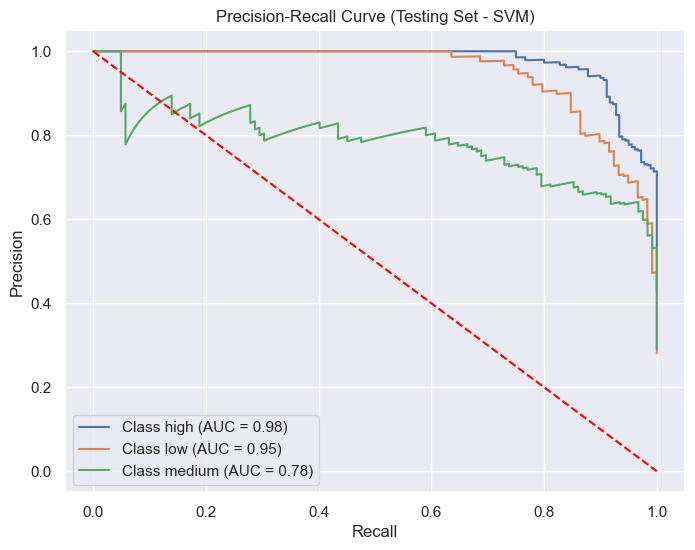

In [67]:
# Fit the model
best_svc.fit(X_test_tr, y_test)

# Get class names
class_names = np.unique(y_test)

# Predict probabilities
y_test_scores = best_svc.predict_proba(X_test_tr)

# Binarize the labels
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_test_lb[:, i], y_test_scores[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Testing Set - SVM)')
plt.legend(loc='best')
plt.show()

### ROC Curve

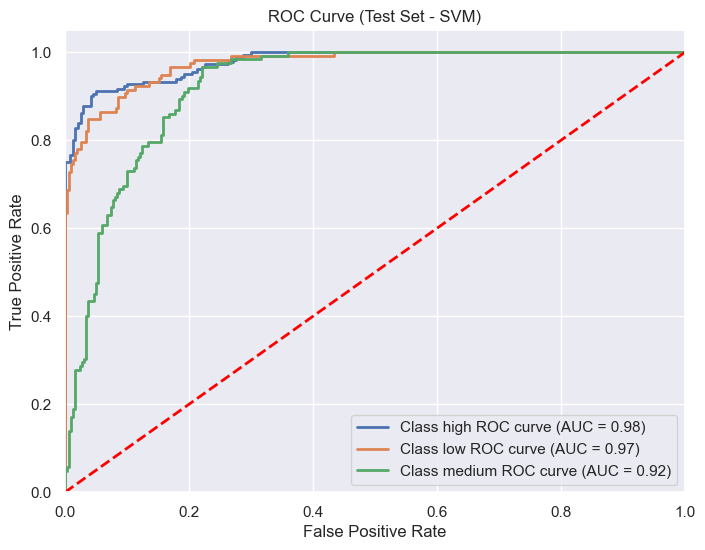

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Get predicted probabilities for the test set
y_probs = best_svc.predict_proba(X_test_tr)

# Get class names
class_names = np.unique(y_train)

# Binarize the test labels for multiclass classification
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    # Compute ROC curve values
    fpr, tpr, _ = roc_curve(y_test_lb[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set - SVM)')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

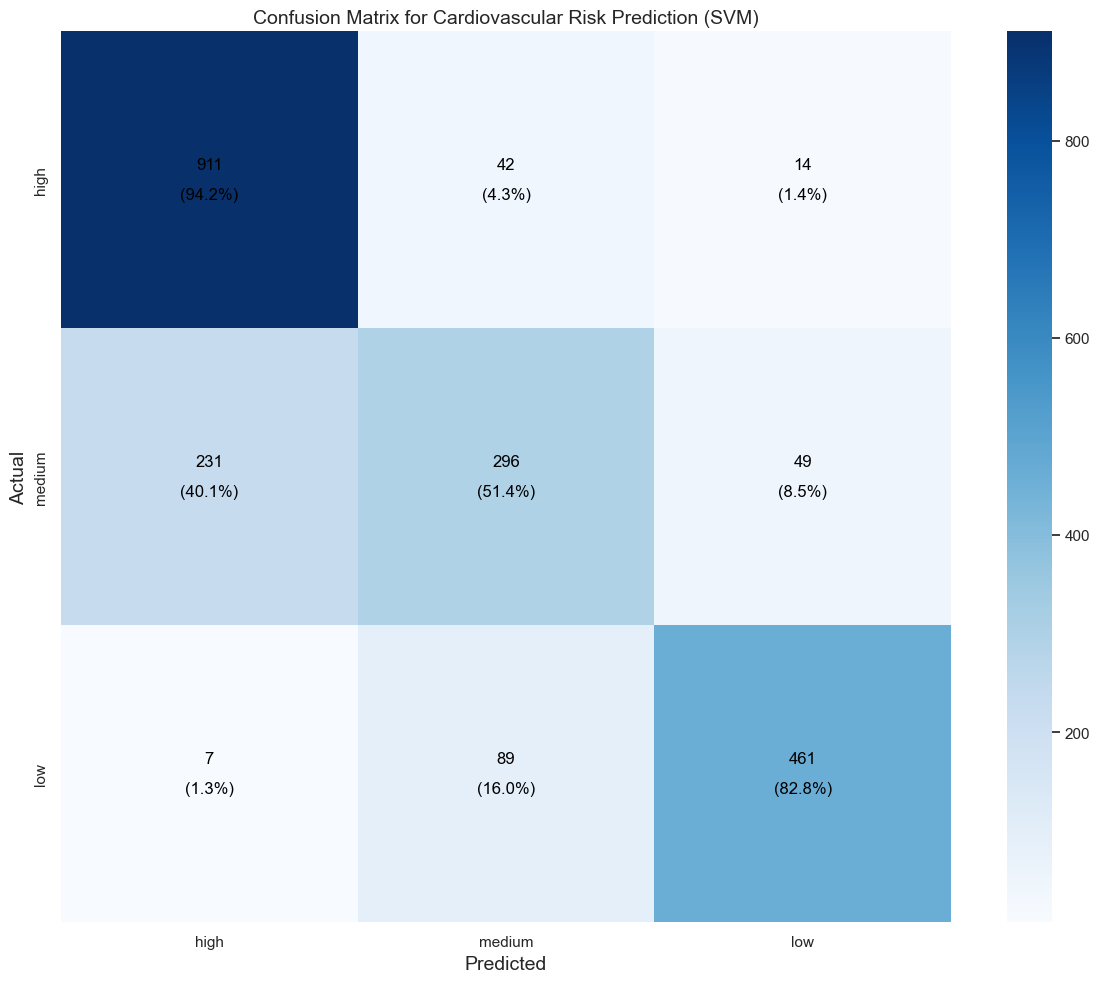

Combined Accuracy: 0.7943


In [69]:
def plot_combined_confusion_matrix(model, X_train, y_train, X_test, y_test):
    # Predict on both training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Combine true labels and predictions
    y_true_combined = np.concatenate([y_train, y_test])
    y_pred_combined = np.concatenate([y_pred_train, y_pred_test])
    
    # Define class order
    class_order = ['high', 'medium', 'low']
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_combined, y_pred_combined, labels=class_order)
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, cmap='Blues', 
                xticklabels=class_order, yticklabels=class_order)
    plt.title('Confusion Matrix for Cardiovascular Risk Prediction (SVM)', fontsize=14)
    plt.ylabel('Actual',fontsize=14)
    plt.xlabel('Predicted',fontsize=14)
    
    # Add value labels
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.45, f'{cm[i, j]}', 
                     ha='center', va='center', color='black', fontsize=12)
            plt.text(j+0.5, i+0.55, f'({cm_percentage[i, j]:.1f}%)', 
                     ha='center', va='center', color='black',fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print(f"Combined Accuracy: {accuracy:.4f}")

# Generate combined confusion matrix
plot_combined_confusion_matrix(best_svc, X_train_tr, y_train, X_test_tr, y_test)

## Second Model: Logistic Regression (Model Training and Validation, Tuning and Testing, Performance Visualization)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

In [71]:
#Initialise the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=5000)

#Fit the model to the training data
log_reg.fit(X_train_tr, y_train)

# Make predictions on training data
y_pred = log_reg.predict(X_train_tr)

# Calculate accuracy for the training set
train_acc_log_reg=accuracy_score(y_train,y_pred)
print(f"Train Set Accuracy: {train_acc_log_reg}")
# Print the classification report for the training set
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred))

# Calculate accuracy for test set
y_pred = log_reg.predict(X_test_tr)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")
# Print the classification report for the testing set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

Train Set Accuracy: 0.986904761904762

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       1.00      0.99      1.00       787
         low       1.00      0.96      0.98       439
      medium       0.96      1.00      0.98       454

    accuracy                           0.99      1680
   macro avg       0.98      0.98      0.98      1680
weighted avg       0.99      0.99      0.99      1680

Test Set Accuracy: 0.9619047619047619

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.97      1.00      0.99       180
         low       0.97      0.93      0.95       118
      medium       0.93      0.93      0.93       122

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420



### Cross Validation

In [72]:
#perform cross validation to check how well new data fits
scores = cross_val_score(log_reg, X_train_tr, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy accross folds:", scores.mean())

Cross-validation scores: [0.9702381  0.9672619  0.9702381  0.9672619  0.98809524]
Mean accuracy accross folds: 0.9726190476190476


### Hyperparameter Tuning with GridSearch for Logistic Regression

In [73]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'solver': ['liblinear','lbfgs']  
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tr, y_train)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


### Use Best Parameter to train train set and test set then show classification report

In [74]:
# Evaluate the model on the train set using the best estimator
y_pred = best_model.predict(X_train_tr)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy}")

# Print the classification report for the training set
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred))

# Evaluate the model on the test set using the best estimator
y_pred = best_model.predict(X_test_tr)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print the classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Print the cross-validation scores for the best model
cv_scores = cross_val_score(best_model, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Train Accuracy: 0.9678571428571429

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       0.99      1.00      0.99       787
         low       0.97      0.92      0.95       439
      medium       0.92      0.96      0.94       454

    accuracy                           0.97      1680
   macro avg       0.96      0.96      0.96      1680
weighted avg       0.97      0.97      0.97      1680

Test Accuracy: 0.9428571428571428

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.97      1.00      0.98       180
         low       0.95      0.89      0.92       118
      medium       0.90      0.91      0.90       122

    accuracy                           0.94       420
   macro avg       0.94      0.93      0.94       420
weighted avg       0.94      0.94      0.94       420


Cross-Validation Accuracy Scores: [0.96428571 0.94642857 0.95535714 0.94642857 0.95833333]
Mean C

### Precision-Recall Curve for Training Set

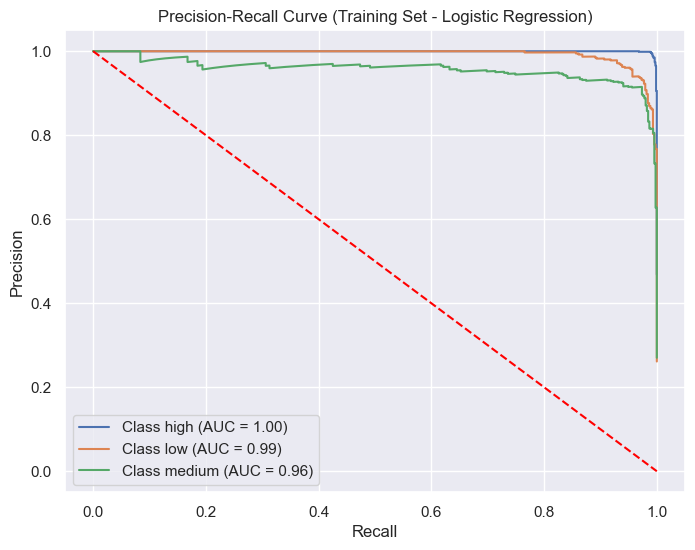

In [75]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Fit the model
best_model.fit(X_train_tr, y_train)

# Get class names
class_names = np.unique(y_train)

# Predict probabilities
y_train_scores = best_model.predict_proba(X_train_tr)

# Binarize the labels
y_train_lb = label_binarize(y_train, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_train_lb[:, i], y_train_scores[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Set - Logistic Regression)')
plt.legend(loc='best')
plt.show()

### Precision-Recall Curve for Testing Set

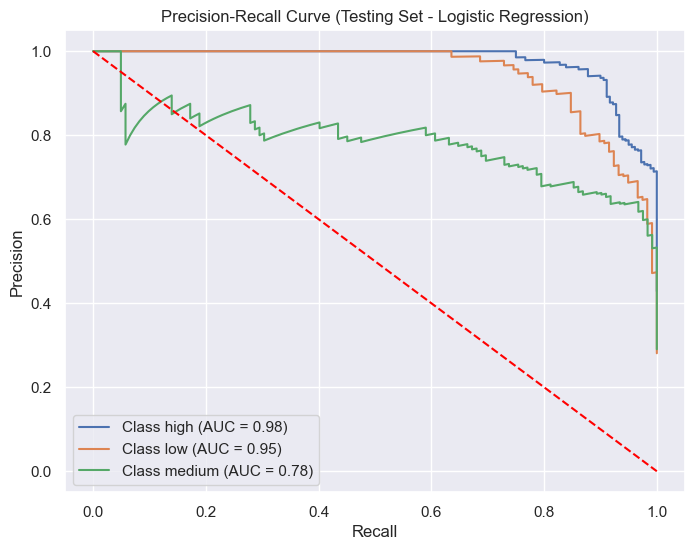

In [76]:
# Fit the model
best_model = LogisticRegression(C=0.1, solver='lbfgs', max_iter=100)
best_model.fit(X_test_tr, y_test)

# Get class names
class_names = np.unique(y_test)

# Predict probabilities
y_train_scores = best_model.predict_proba(X_test_tr)

# Binarize the labels
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_test_lb[:, i], y_test_scores[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Testing Set - Logistic Regression)')
plt.legend(loc='best')
plt.show()

### ROC Curve

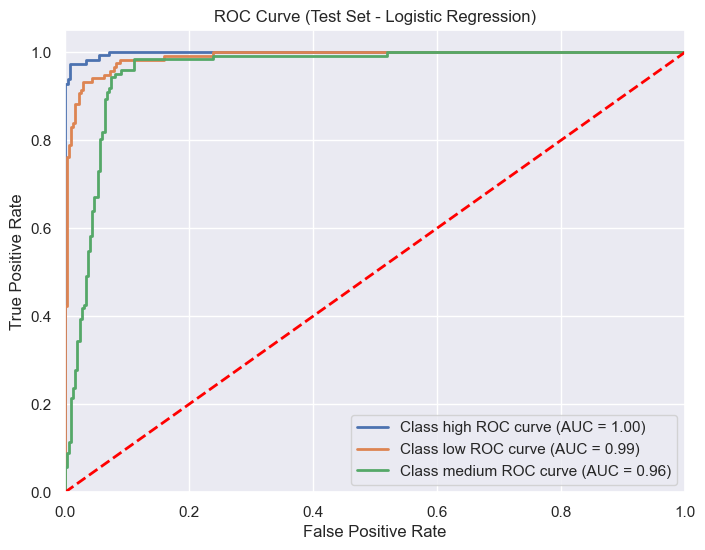

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Get predicted probabilities for the test set
y_probs = best_model.predict_proba(X_test_tr)

# Get class names
class_names = np.unique(y_train)

# Binarize the test labels for multiclass classification
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    # Compute ROC curve values
    fpr, tpr, _ = roc_curve(y_test_lb[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set - Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

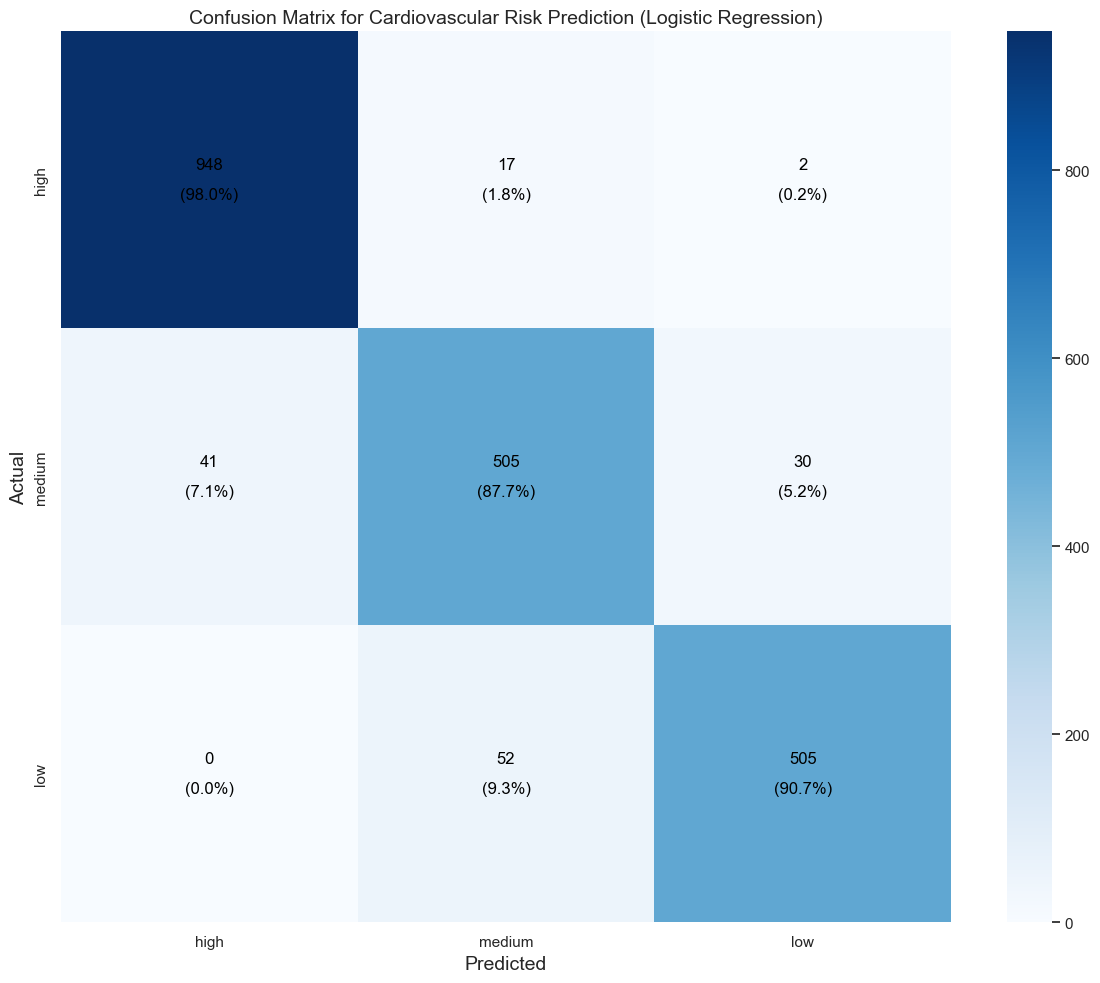

Combined Accuracy: 0.9324


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_combined_confusion_matrix(model, X_train, y_train, X_test, y_test):
    # Predict on both training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Combine true labels and predictions
    y_true_combined = np.concatenate([y_train, y_test])
    y_pred_combined = np.concatenate([y_pred_train, y_pred_test])
    
    # Define class order
    class_order = ['high', 'medium', 'low']
    
    # Compute confusion matrix
    cm_log_reg = confusion_matrix(y_true_combined, y_pred_combined, labels=class_order)
    
    # Calculate percentages
    cm_percentage = cm_log_reg.astype('float') / cm_log_reg.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_log_reg, annot=False, cmap='Blues', 
                xticklabels=class_order, yticklabels=class_order)
    plt.title('Confusion Matrix for Cardiovascular Risk Prediction (Logistic Regression)', fontsize=14)
    plt.ylabel('Actual',fontsize=14)
    plt.xlabel('Predicted',fontsize=14)
    
    # Add value labels
    for i in range(cm_log_reg.shape[0]):
        for j in range(cm_log_reg.shape[1]):
            plt.text(j+0.5, i+0.45, f'{cm_log_reg[i, j]}', 
                     ha='center', va='center', color='black', fontsize=12)
            plt.text(j+0.5, i+0.55, f'({cm_percentage[i, j]:.1f}%)', 
                     ha='center', va='center', color='black',fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print accuracy
    accuracy = np.sum(np.diag(cm_log_reg)) / np.sum(cm_log_reg)
    print(f"Combined Accuracy: {accuracy:.4f}")

# Generate combined confusion matrix
plot_combined_confusion_matrix(best_model, X_train_tr, y_train, X_test_tr, y_test)

## Third Model: Random Forest (Model Training and Validation, Tuning and Testing, Performance Visualization)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

In [80]:
# Initialize the Random Forest model with updated hyperparameters
rf_model = RandomForestClassifier(
    random_state=42, 
    n_estimators=50,          
    max_depth=5,             # Limit the depth of trees
    max_features='sqrt',      # Use a subset of features for each split
    min_samples_split=10,     # Require at least 10 samples to split a node
    min_samples_leaf=5        # Require at least 5 samples at a leaf node
)

# Fit the model to the training data
rf_model.fit(X_train_tr, y_train)

# Make predictions on the training data
y_pred_train_rf = rf_model.predict(X_train_tr)

# Calculate accuracy for the training set
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Training Set Accuracy: {train_acc_rf}")
# Print the classification report for the training set
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred_train_rf))

# Make predictions on the test data
y_pred_test_rf = rf_model.predict(X_test_tr)

# Calculate accuracy for the test set
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Set Accuracy: {test_acc_rf}")
# Print the classification report for the testing set
print("\nClassification Report (Train Set):")
print(classification_report(y_test, y_pred_test_rf))

Training Set Accuracy: 0.9125

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       0.95      0.92      0.94       787
         low       0.95      0.92      0.94       439
      medium       0.82      0.88      0.85       454

    accuracy                           0.91      1680
   macro avg       0.91      0.91      0.91      1680
weighted avg       0.92      0.91      0.91      1680

Test Set Accuracy: 0.8476190476190476

Classification Report (Train Set):
              precision    recall  f1-score   support

        high       0.90      0.89      0.89       180
         low       0.93      0.84      0.88       118
      medium       0.71      0.80      0.75       122

    accuracy                           0.85       420
   macro avg       0.85      0.84      0.84       420
weighted avg       0.85      0.85      0.85       420



### Cross Validation on Random Forest Model

In [81]:
#perform cross validation to check how well new data fits
scores_rf = cross_val_score(rf_model, X_train_tr, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy across folds:", scores.mean())

Cross-validation scores: [0.9702381  0.9672619  0.9702381  0.9672619  0.98809524]
Mean accuracy across folds: 0.9726190476190476


### Hyperparameter Tuning with GridSearch for Random Forest

In [82]:
# Define a more conservative parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],          
    'max_depth': [5, 8, 10],            # Further restrict tree depth
    'min_samples_split': [20, 25],      # Further increase min samples required to split
    'min_samples_leaf': [10, 15],       # Further increase min samples at a leaf
    'max_features': ['sqrt', 'log2'],   # Further reduce the number of features considered
    'bootstrap': [True],                # Use bootstrap samples
}

# Perform GridSearchCV with stratified k-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the entire training data
grid_search_rf.fit(X_train_tr, y_train)

# Access the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

print("Best parameters (Random Forest):", best_params_rf)

# Evaluate the model with the best hyperparameters
y_pred_train_best_rf = best_rf_model.predict(X_train_tr)
train_acc_best_rf = accuracy_score(y_train, y_pred_train_best_rf)
print(f"Training Set Accuracy (Best Model): {train_acc_best_rf}")

y_pred_test_best_rf = best_rf_model.predict(X_test_tr)
test_acc_best_rf = accuracy_score(y_test, y_pred_test_best_rf)
print(f"Test Set Accuracy (Best Model): {test_acc_best_rf}")

Best parameters (Random Forest): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}
Training Set Accuracy (Best Model): 0.9648809523809524
Test Set Accuracy (Best Model): 0.9285714285714286


### Use Best Parameter to train train set and test set then show classification report

In [83]:
# Evaluate the Random Forest model on the train set using the best estimator
y_pred_train_rf = best_rf_model.predict(X_train_tr)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Train Accuracy (Random Forest): {train_accuracy_rf}")

# Print the classification report for the training set
print("\nClassification Report (Train Set - Random Forest):")
print(classification_report(y_train, y_pred_train_rf))

# Evaluate the Random Forest model on the test set using the best estimator
y_pred_test_rf = best_rf_model.predict(X_test_tr)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf}")

# Print the classification report for the test set
print("\nClassification Report (Test Set - Random Forest):")
print(classification_report(y_test, y_pred_test_rf))

# Print the cross-validation scores for the best Random Forest model
cv_scores_rf = cross_val_score(best_rf_model, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores (Random Forest): {cv_scores_rf}")
print(f"Mean Cross-Validation Accuracy (Random Forest): {cv_scores_rf.mean()}")

Train Accuracy (Random Forest): 0.9648809523809524

Classification Report (Train Set - Random Forest):
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       787
         low       0.95      0.95      0.95       439
      medium       0.94      0.94      0.94       454

    accuracy                           0.96      1680
   macro avg       0.96      0.96      0.96      1680
weighted avg       0.96      0.96      0.96      1680

Test Accuracy (Random Forest): 0.9285714285714286

Classification Report (Test Set - Random Forest):
              precision    recall  f1-score   support

        high       0.96      0.99      0.98       180
         low       0.94      0.87      0.91       118
      medium       0.87      0.89      0.88       122

    accuracy                           0.93       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.93      0.93      0.93       420


Cross-Validation Accuracy Scores 

### Precision-Recall Curve for Training Set

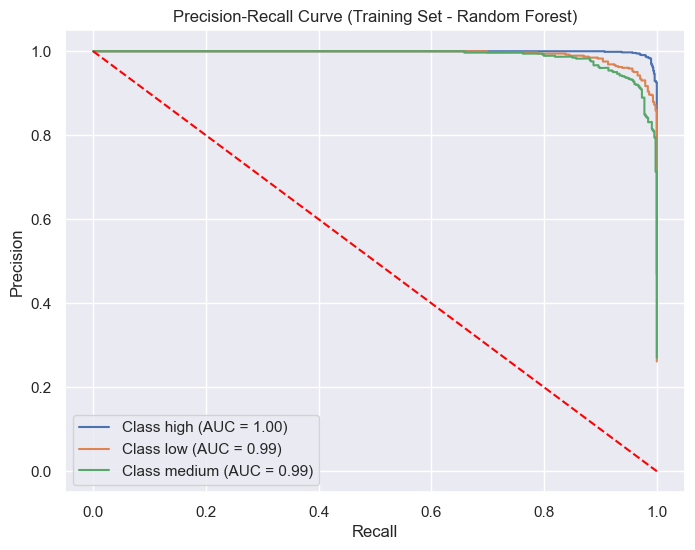

In [84]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Fit the model
best_rf_model.fit(X_train_tr, y_train)

# Get class names
class_names = np.unique(y_train)

# Predict probabilities
y_train_scores_rf = best_rf_model.predict_proba(X_train_tr)

# Binarize the labels
y_train_lb = label_binarize(y_train, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_train_lb[:, i], y_train_scores_rf[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Set - Random Forest)')
plt.legend(loc='best')
plt.show()

### Precision-Recall Curve for Testing Set

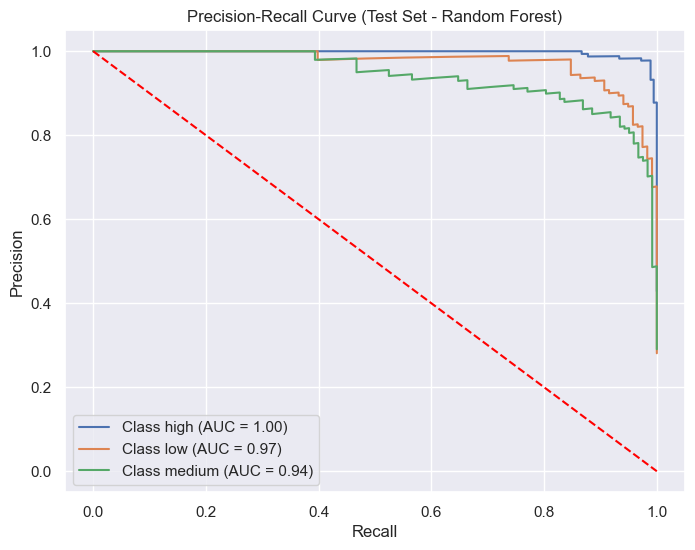

In [85]:
# Fit the model on the training data 
best_rf_model.fit(X_train_tr, y_train)

# Get class names from the test set
class_names = np.unique(y_test)

# Predict probabilities on the test set
y_test_scores_rf = best_rf_model.predict_proba(X_test_tr)

# Binarize the labels
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_test_lb[:, i], y_test_scores_rf[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Class {class_name} (AUC = {auc_score:.2f})')

plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set - Random Forest)')
plt.legend(loc='best')
plt.show()

### ROC curve

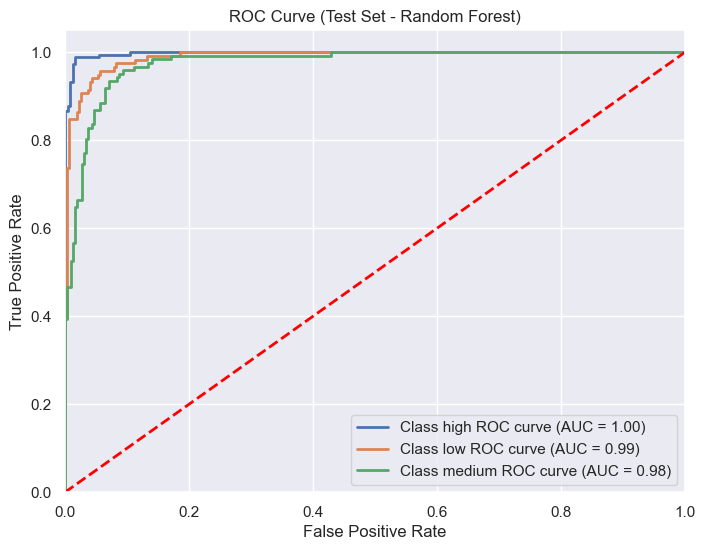

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Fit the model on the training data
best_rf_model.fit(X_train_tr, y_train)

# Get predicted probabilities for the test set
y_probs_rf = best_rf_model.predict_proba(X_test_tr)

# Get class names from the test set
class_names = np.unique(y_test)

# Binarize the test labels for multiclass classification
y_test_lb = label_binarize(y_test, classes=class_names)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    # Compute ROC curve values
    fpr, tpr, _ = roc_curve(y_test_lb[:, i], y_probs_rf[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set - Random Forest)')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

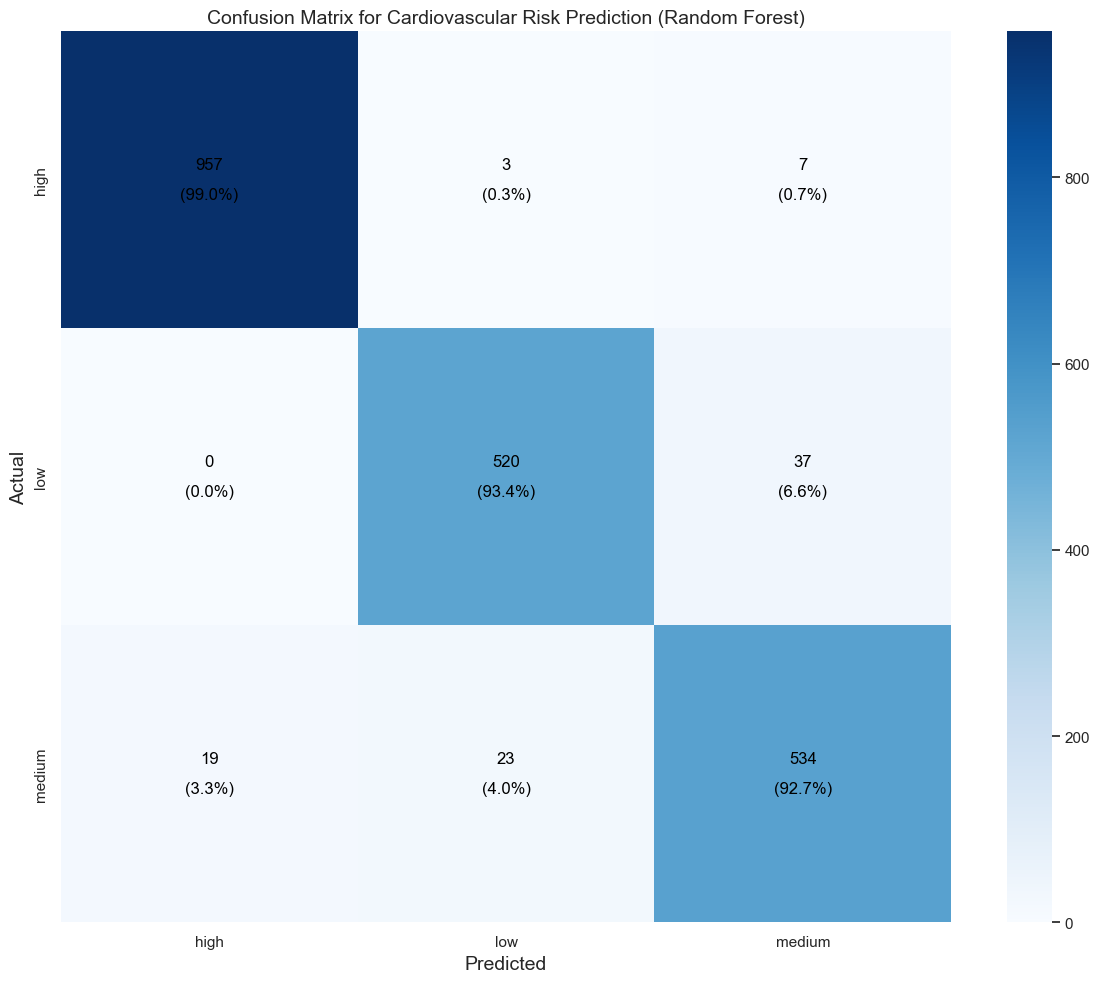

Combined Accuracy: 0.9576


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_combined_confusion_matrix(model, X_train, y_train, X_test, y_test):
    # Predict on both training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Combine true labels and predictions
    y_true_combined = np.concatenate([y_train, y_test])
    y_pred_combined = np.concatenate([y_pred_train, y_pred_test])
    
    # Define class order
    class_order = np.unique(y_train)  # Get class order dynamically from training labels
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_combined, y_pred_combined, labels=class_order)
    
    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, cmap='Blues', 
                xticklabels=class_order, yticklabels=class_order)
    plt.title('Confusion Matrix for Cardiovascular Risk Prediction (Random Forest)', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    
    # Add value labels
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.45, f'{cm[i, j]}', 
                     ha='center', va='center', color='black', fontsize=12)
            plt.text(j + 0.5, i + 0.55, f'({cm_percentage[i, j]:.1f}%)', 
                     ha='center', va='center', color='black', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print(f"Combined Accuracy: {accuracy:.4f}")

# Initialize and train the best Random Forest model
best_rf_model.fit(X_train_tr, y_train)

# Generate combined confusion matrix
plot_combined_confusion_matrix(best_rf_model, X_train_tr, y_train, X_test_tr, y_test)